# Google Analytics Revenue Prediction

## EDA

**Environment**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import ttest_ind

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df3.csv", low_memory=False)

In [4]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsHits,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google,0.0
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,1,0.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0


### EDA NUMERICAL

Subsetting the dataframe with the numerical vars

In [5]:
num_cols = ['totalsTransactionRevenue','totalsHits','totalsPageviews','adwordsClickInfoPage']

In [6]:
df[num_cols]

,totalsTransactionRevenue,totalsHits,totalsPageviews,adwordsClickInfoPage
0,0.0,1,1.0,0.0
1,0.0,1,1.0,0.0
2,0.0,1,1.0,0.0
3,0.0,1,1.0,0.0
4,0.0,1,1.0,0.0
5,0.0,1,1.0,0.0
6,0.0,1,1.0,0.0
7,0.0,1,1.0,0.0
8,0.0,1,1.0,0.0
9,0.0,1,1.0,0.0


In [7]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
totalsTransactionRevenue,903553.0,1.704461e+06,5.278158e+07,0.0,0.0,0.0,0.0,2.312950e+10
totalsHits,903553.0,4.596866e+00,9.641905e+00,1.0,1.0,2.0,4.0,5.000000e+02
totalsPageviews,903553.0,3.849764e+00,7.025274e+00,1.0,1.0,1.0,4.0,4.690000e+02
adwordsClickInfoPage,903553.0,2.394326e-02,1.558196e-01,0.0,0.0,0.0,0.0,1.400000e+01


#### TARGET VAR: totalsTransactionRevenue

The target is a var called **totalsTransactionRevenue** wich is the exponential of the revenue in dollars.

In the distribution we see there are many 0: 'No Buy' and different Numerical values for the logarith of the amout.

In [8]:
df.totalsTransactionRevenue.value_counts().head()

0.0           892038
16990000.0       256
18990000.0       189
33590000.0       187
44790000.0       170
Name: totalsTransactionRevenue, dtype: int64

Numbers of Nulls:  0
The description of this variable is:
 count    9.035530e+05
mean     1.704461e+06
std      5.278158e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: totalsTransactionRevenue, dtype: float64


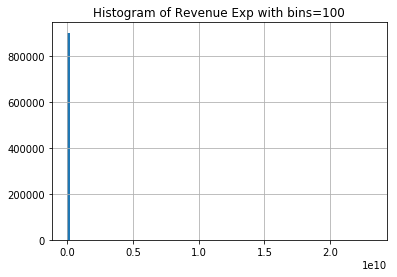

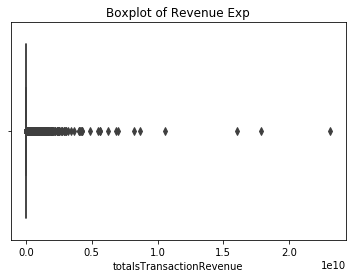

In [9]:
desc_num(df['totalsTransactionRevenue'],100, 'Revenue Exp')

I'll review the distribution of the positive values of the column

Numbers of Nulls:  0
The description of this variable is:
 count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: totalsTransactionRevenue, dtype: float64


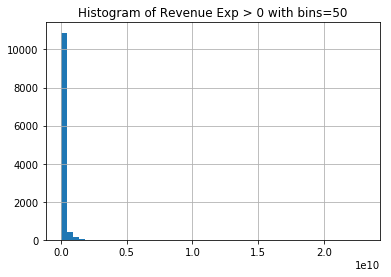

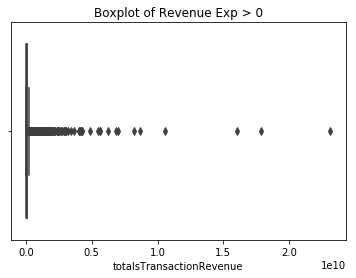

In [10]:
desc_num(df['totalsTransactionRevenue'].loc[df['totalsTransactionRevenue']>0],50, 'Revenue Exp > 0')

The distributions seams very right skeewed, and very unbalances.

I will create 2 new columns:
* the column with the dollar revenues (log)
* the column with boolean Buy, NotBuy

In [11]:
df['totalsTransactionRevenueDoll'] = df['totalsTransactionRevenue'].apply(lambda x: math.log(x) if x>0 else 0)

Numbers of Nulls:  0
The description of this variable is:
 count    11515.000000
mean        17.823362
std          1.202494
min          9.210340
25%         17.031582
50%         17.716473
75%         18.494442
max         23.864375
Name: totalsTransactionRevenueDoll, dtype: float64


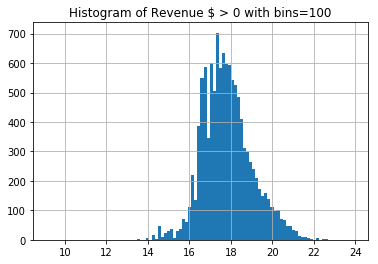

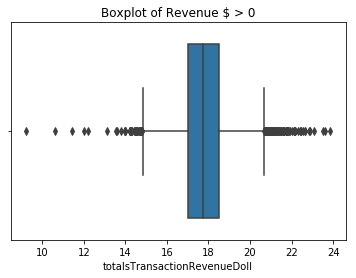

In [12]:
desc_num(df['totalsTransactionRevenueDoll'].loc[df['totalsTransactionRevenueDoll']>0],100,'Revenue $ > 0')


In [13]:
df['totalsIsTransaction'] = df['totalsTransactionRevenue'].apply(lambda x: True if x>0 else False)

In [14]:
df['totalsIsTransaction'].value_counts()

False    892038
True      11515
Name: totalsIsTransaction, dtype: int64

In [15]:
buy = df.groupby('totalsIsTransaction')['channelGrouping'].count().reset_index()
buy.columns = ['transaction','count']

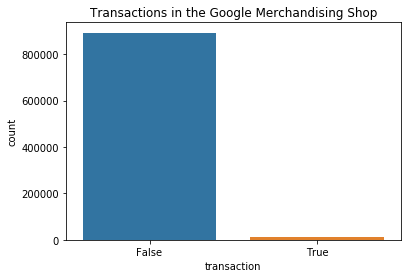

In [16]:
sns.barplot(x='transaction', y='count', data=buy)
plt.title('Transactions in the Google Merchandising Shop')
plt.show()

#### totalsHits 

**Hits**: The number of a single file request in the access of a Web server. For example, a request for an HTML page with three graphic images will result in four hits 

**Page Views** – Measures how many times someone has viewed an entire page including all text, images, etc.

Numbers of Nulls:  0
The description of this variable is:
 count    903553.000000
mean          4.596866
std           9.641905
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         500.000000
Name: totalsHits, dtype: float64


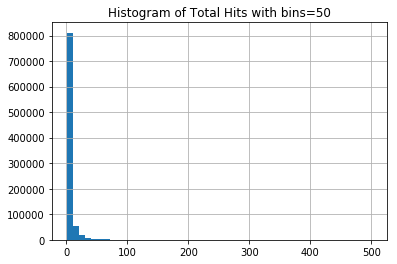

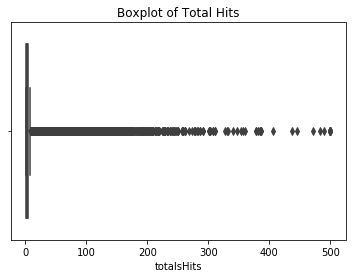

In [17]:
desc_num(df['totalsHits'], 50, 'Total Hits')

In [18]:
hits = df.groupby('totalsHits')['channelGrouping'].count().reset_index()
hits.columns = ['Hits','count']

In [19]:
hits.sort_values(by='Hits', ascending=False).head()

,Hits,count
273,500,10
272,489,1
271,483,1
270,471,1
269,445,1


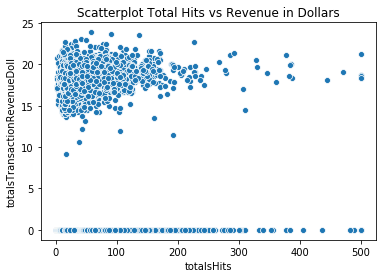

In [20]:
ax = sns.scatterplot(x='totalsHits', y='totalsTransactionRevenueDoll', data=df)
ax.set_title('Scatterplot Total Hits vs Revenue in Dollars')
plt.show()

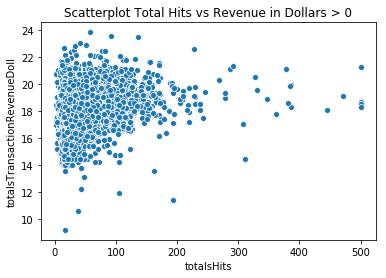

In [21]:
ax = sns.scatterplot(x='totalsHits', y='totalsTransactionRevenueDoll', data=df.loc[df['totalsTransactionRevenueDoll']>0])
ax.set_title('Scatterplot Total Hits vs Revenue in Dollars > 0')
plt.show()

Eventhough this var apears to have many outliers, but after reviewing the data, the visits seam real, so I keep them.

#### totalsPageviews 

Numbers of Nulls:  0
The description of this variable is:
 count    903553.000000
mean          3.849764
std           7.025274
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         469.000000
Name: totalsPageviews, dtype: float64


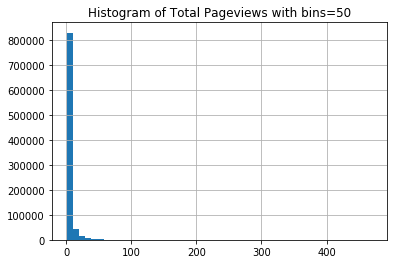

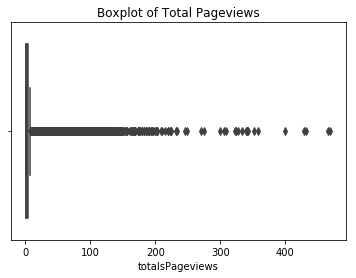

In [22]:
desc_num(df['totalsPageviews'], 50, 'Total Pageviews')

Again, it appears that there are many outliers

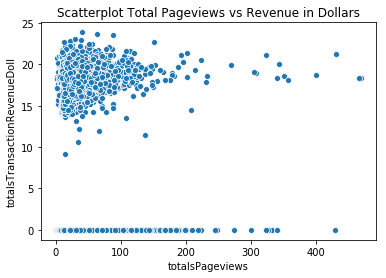

In [23]:
ax = sns.scatterplot(x='totalsPageviews', y='totalsTransactionRevenueDoll', data=df)
ax.set_title('Scatterplot Total Pageviews vs Revenue in Dollars')
plt.show()

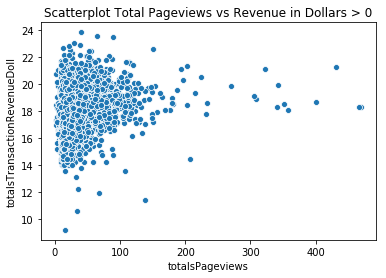

In [24]:
ax = sns.scatterplot(x='totalsPageviews', y='totalsTransactionRevenueDoll', data=df.loc[df['totalsTransactionRevenueDoll']>0])
ax.set_title('Scatterplot Total Pageviews vs Revenue in Dollars > 0')
plt.show()

Let's see the relation between Hits and Pageviews

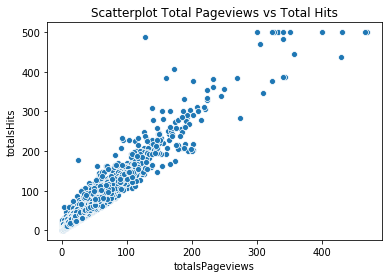

In [25]:
ax = sns.scatterplot(x='totalsPageviews', y='totalsHits', data=df)
ax.set_title('Scatterplot Total Pageviews vs Total Hits')
plt.show()

**COMENTS:**
    * There is a positive linear correlation in Hits-Pageviews
    * The limit of Hits seems to be 500. Eventhoug there are more.

#### adwordsClickInfoPage

Numbers of Nulls:  0
The description of this variable is:
 count    903553.000000
mean          0.023943
std           0.155820
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: adwordsClickInfoPage, dtype: float64


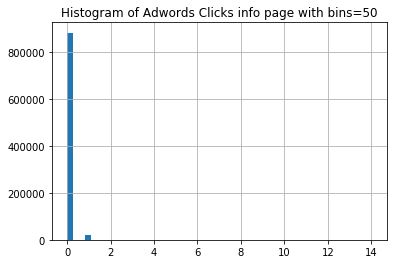

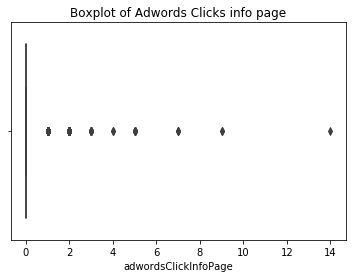

In [26]:
desc_num(df['adwordsClickInfoPage'], 50, 'Adwords Clicks info page')

This var is very unbalanced as there is only positive values, for the adwords campaigns.

In [27]:
df['adwordsClickInfoPage'].value_counts()

0.0     882093
1.0      21362
2.0         73
3.0         10
5.0          7
7.0          3
4.0          2
9.0          2
14.0         1
Name: adwordsClickInfoPage, dtype: int64

Numbers of Nulls:  0
The description of this variable is:
 count    21460.000000
mean         1.008108
std          0.173584
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: adwordsClickInfoPage, dtype: float64


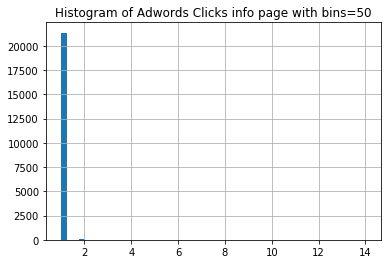

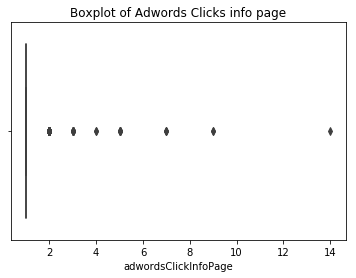

In [28]:
desc_num(df['adwordsClickInfoPage'].loc[df['adwordsClickInfoPage']>0], 50, 'Adwords Clicks info page')

The means of the target by the different values of adwordsClickInfoPage seams to be unrelevant for the values above 2.


In [29]:
df.groupby('adwordsClickInfoPage')['totalsTransactionRevenueDoll','totalsIsTransaction'].mean()

,totalsTransactionRevenueDoll,totalsIsTransaction
adwordsClickInfoPage,,
0.0,0.223603,0.012539
1.0,0.374366,0.021253
2.0,0.000000,0.000000
3.0,0.000000,0.000000
4.0,0.000000,0.000000
5.0,0.000000,0.000000
7.0,0.000000,0.000000
9.0,0.000000,0.000000
14.0,0.000000,0.000000


In [30]:
df[['adwordsClickInfoPage','totalsTransactionRevenueDoll','totalsIsTransaction']].loc[df['adwordsClickInfoPage'] > 1]

,adwordsClickInfoPage,totalsTransactionRevenueDoll,totalsIsTransaction
10921,5.0,0.0,False
10930,5.0,0.0,False
15295,3.0,0.0,False
25846,2.0,0.0,False
30704,2.0,0.0,False
39319,2.0,0.0,False
46453,3.0,0.0,False
47477,2.0,0.0,False
103242,2.0,0.0,False
121081,14.0,0.0,False


I will delete those 98 rows as they seem to be errors or outliers.

In [31]:
df.loc[df['adwordsClickInfoPage'] > 1].count()[0]

98

In [32]:
rows_to_drop = df.loc[df['adwordsClickInfoPage'] > 1]
df = df.drop(rows_to_drop.index, axis=0)

In [33]:
df['adwordsClickInfoPage'].value_counts()

0.0    882093
1.0     21362
Name: adwordsClickInfoPage, dtype: int64

This is now a boolean vsar with only 2 values: 0 and 1

In [34]:
df.head()

,channelGrouping,date,fullVisitorId,visitNumber,visitStartTime,deviceBrowser,deviceCategory,deviceIsMobile,deviceOS,geoCity,geoContinent,geoCountry,geoMetro,geoDomain,geoRegion,geoSubContinent,totalsBounces,totalsHits,totalsNewVisits,totalsPageviews,trafficSourceAdContent,adwordsClickAdNetworkType,adwordsClickGclId,adwordsClickInfoPage,adwordsClickInfoSlot,trafficSourceCampaign,trafficSourceIsTrueDirect,trafficSourceKeyword,trafficSourceMedium,trafficSourceReferralPath,trafficSourceSource,totalsTransactionRevenue,totalsTransactionRevenueDoll,totalsIsTransaction
0,Organic Search,2016-09-02,1131660440785968503,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,Unknown,ttnet.com.tr,Izmir,Western Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
1,Organic Search,2016-09-02,377306020877927890,1,1472880147,Firefox,desktop,False,Macintosh,Unknown,Oceania,Australia,Unknown,dodo.net.au,Unknown,Australasia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
2,Organic Search,2016-09-02,3895546263509774583,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,Unknown,Unknown,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,NoKeyword,organic,NoReferral,google,0.0,0.0,False
3,Organic Search,2016-09-02,4763447161404445595,1,1472881213,UC Browser,desktop,False,Linux,Unknown,Asia,Indonesia,Unknown,Unknown,Unknown,Southeast Asia,1.0,1,1.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,False,google + online,organic,NoReferral,google,0.0,0.0,False
4,Organic Search,2016-09-02,27294437909732085,2,1472822600,Chrome,mobile,True,Android,Unknown,Europe,United Kingdom,Unknown,Unknown,Unknown,Northern Europe,1.0,1,0.0,1.0,NoAd,NoAdWords,0,0.0,NoAdwords,NoCampaign,True,NoKeyword,organic,NoReferral,google,0.0,0.0,False


#### Correlation of the numeric vars

In [35]:
corr = df[num_cols].corr()

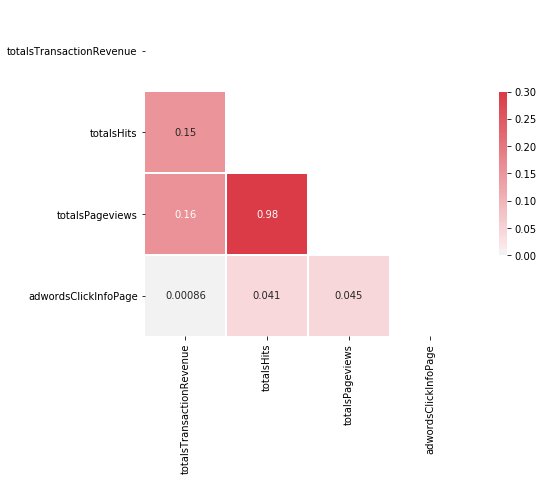

In [36]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(300, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

The total pageviews and hits are **highly correlated**

#### Pairplot of the numeric vars

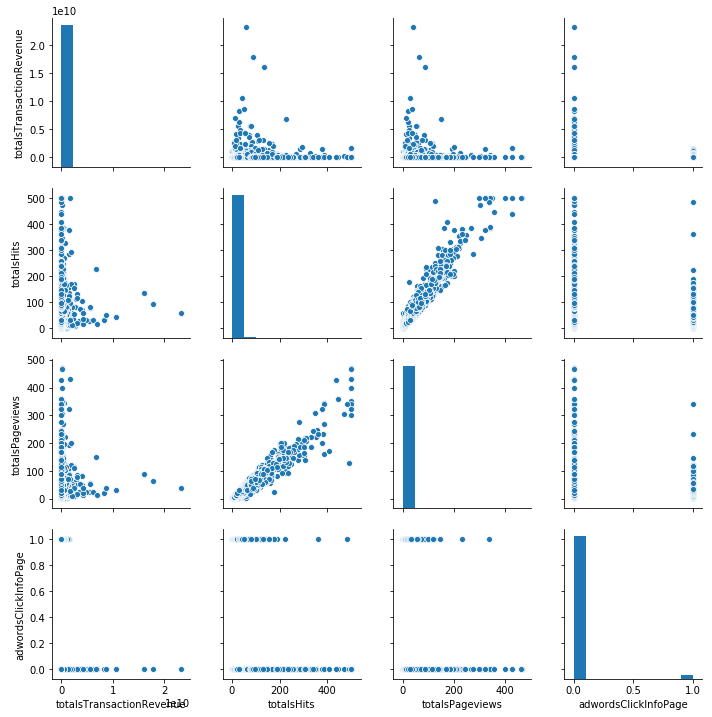

In [37]:
ax = sns.pairplot(df[num_cols])
plt.show()

The only vars that seam to bee linear correlated are again, Pageviews and Hits

### HYPOTHESIS: Traffic Source influence Revenues

#### Hypothesis: The visits comming from 'Paid Search' spend more

**Ho** = The visits from 'Paid Search' spend the same or less than visits from other sources.<br>
**H1** = The visits from 'Paid Search' spend more than visits from other sources.

In [38]:
revenuePaidVisit = df[['channelGrouping','totalsTransactionRevenueDoll']].loc[df['channelGrouping'] == 'Paid Search']
revenueNotPaidVisit = df[['channelGrouping','totalsTransactionRevenueDoll']].loc[df['channelGrouping'] != 'Paid Search']
               

In [39]:
Paid_mean = np.mean(revenuePaidVisit['totalsTransactionRevenueDoll'])
NoPaid_mean = np.mean(revenueNotPaidVisit['totalsTransactionRevenueDoll'])
print("week1 mean value:",Paid_mean)
print("week2 mean value:",NoPaid_mean)

week1 mean value: 0.3268109524079677
week2 mean value: 0.22430571158208418


In [40]:
Paid_std = np.std(revenuePaidVisit['totalsTransactionRevenueDoll'])
NoPaid_std = np.std(revenueNotPaidVisit['totalsTransactionRevenueDoll'])
print("week1 std value:",Paid_std)
print("week2 std value:",NoPaid_std)

week1 std value: 2.3819242975793196
week2 std value: 1.9919349523108063


In [41]:
alpha = 0.05
ttest, pval = ttest_ind(revenuePaidVisit['totalsTransactionRevenueDoll'],revenueNotPaidVisit['totalsTransactionRevenueDoll'])
print("p-value",pval)
print("ttest",round(ttest,4))
if pval < alpha:
  print("We can reject the null hypothesis")
else:
  print("We accept null hypothesis")

p-value 1.1432795193823663e-15
ttest 8.0106
We can reject the null hypothesis


In **Conclusion** the visits from 'Paid Search' spend more than visits from other sources

### Export the changes of the dataset

In [42]:
df.to_csv("data/df3-2.csv", index=False)